In [2]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
sns.set_style(style="white")
from matplotlib import pyplot as plt
import datetime
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [58]:
OUTPUTDIR = "img/"
final_df = pd.read_csv("data/final/final_merge_region.csv")

In [ ]:
value_per_continent = final_df.groupby(["region","year"]).mean()
value_per_subcontinent = final_df.groupby(["sub-region","year"]).mean()

In [ ]:
def plot_lines_year_simple():
    # plot continent over time
    # plot sub-regions over time
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(16,8))
    plt.subplots_adjust(wspace=0.3)
    sns.lineplot(x='year', y='score', hue="region", data=value_per_continent, ax=ax1)
    sns.lineplot(x='year', y='score', hue="sub-region", data=value_per_subcontinent, ax=ax2)

    ax1.title.set_text("Continents")
    ax1.set_ylabel("Happiness Score")
    ax1.set_xlabel("Year")
    ax1.tick_params(axis="y", labelsize=15)
    ax1.tick_params(axis="x", labelsize=13)
    ax2.tick_params(axis="x", labelsize=13)
    ax2.title.set_text('Sub-Regions')
    ax2.set_xlabel("Year")

    ax1.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)
    ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt.savefig(OUTPUTDIR + '/lineplots.png', bbox_inches="tight")
    plt.show()

In [ ]:
# plot continent over time
# plot sub-regions over time
value_per_continent = final_df.groupby(["region","year"]).mean()
value_sub_region = final_df.groupby(["region","sub-region","year"]).mean()

fig, ax = plt.subplots(ncols=2,nrows=3,sharey=True,figsize=(12,10))

sns.lineplot(x='year', y='score', hue="region", data=value_per_continent, ax=ax[0,0])
sns.lineplot(x='year', y='score', hue="sub-region", data=value_sub_region.loc[("Europe")], ax=ax[0,1])
sns.lineplot(x='year', y='score', hue="sub-region", data=value_sub_region.loc[("Africa")], ax=ax[1,0])
sns.lineplot(x='year', y='score', hue="sub-region", data=value_sub_region.loc[("Oceania")], ax=ax[1,1])
sns.lineplot(x='year', y='score', hue="sub-region", data=value_sub_region.loc[("Asia")], ax=ax[2,0])
sns.lineplot(x='year', y='score', hue="sub-region", data=value_sub_region.loc[("Americas")], ax=ax[2,1])

plt.subplots_adjust(wspace=0.6, hspace=0.45)
ax[0,0].legend(bbox_to_anchor=(1.35, 1), loc='upper right', borderaxespad=0)
ax[0,0].title.set_text("Continents")
ax[1,0].legend(bbox_to_anchor=(1.55, 1), loc='upper right', borderaxespad=0)
ax[1,0].title.set_text("Africa")
ax[2,0].legend(bbox_to_anchor=(1.54, 1), loc='upper right', borderaxespad=0)
ax[2,0].title.set_text("Asia")
ax[0,1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax[0,1].title.set_text("Europe")
ax[1,1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax[1,1].title.set_text("Oceania")
ax[2,1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax[2,1].title.set_text("America")

plt.savefig(OUTPUTDIR + '/lineplots_all.png', bbox_inches="tight")
plt.show()

In [ ]:
df_unique_countries = final_df.drop_duplicates(subset="country")[["region", "country","score"]]
lol = final_df.groupby(["region","country"]).mean()
lol.loc[("Africa")]["score"].isna().sum()

lol = final_df.drop_duplicates(subset=["country", "region"])[["region","score", "country"]].groupby(["region", "score"], dropna=False).count()
lol = lol.reset_index()
mask = lol.score.isna()
lol[mask]

In [ ]:
df_unique_countries = final_df.drop_duplicates(subset="country")[["sub-region", "country"]]
df_unique_countries.loc[df_unique_countries["sub-region"] == "Latin America and the Caribbean"].country.unique()

### World Map Plot

In [ ]:
def plot_world(plot_2015 = False):
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    # rename the columns so that we can merge with our data
    world.columns=['pop_est', 'continent', 'name', 'country', 'gdp_md_est', 'geometry']
    # then merge with our data 
    df_2021 = final_df.loc[final_df.year == 2015][["country","score"]]
    df_2015 = final_df.loc[final_df.year == 2021][["country","score"]]
    merge=pd.merge(world,df_2021,on='country', how="left")

    filename = 'world_2021.png'
    title = 'Happiness Score 2021'
    vmin = 2.5
    vmax = 8
    if plot_2015:
        merge=pd.merge(world,df_2015,on='country', how="left")
        filename = 'world_2015.png'
        title = 'Happiness Score 2015'

    # plot confirmed cases world map 
    ax = merge.plot(column='score',
                    figsize=(25, 20),
                    legend=True,cmap='coolwarm', 
                    vmin=vmin, vmax= vmax,
                    missing_kwds={'color': 'lightgrey'},
                    legend_kwds={'pad': 0.01, 'orientation': "horizontal"})
    fig = ax.figure
    cb_ax = fig.axes[1] 
    cb_ax.tick_params(labelsize=20)

    plt.title(title,fontsize=25)
    plt.savefig(OUTPUTDIR + filename, bbox_inches="tight")
plot_world(True)

In [4]:
def plot_gdp():
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    # rename the columns so that we can merge with our data
    world = world[(world.pop_est>0) & (world.name!="Antarctica")] 
    #calculate GDP per capita by dividing GDP by population size
    world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

    plot_2015 = False
    filename = 'world_2021.png'
    title = 'GDP Per Capita'
    plt.subplots_adjust(hspace=0.1)

    # plot confirmed cases world map 
    ax = world.plot(column='gdp_per_cap',
                    figsize=(25, 20),
                    legend=True,cmap='OrRd', 
                    missing_kwds={'color': 'lightgrey'},
                    legend_kwds={'pad': 0.01, 'orientation': "horizontal"})
    fig = ax.figure
    cb_ax = fig.axes[1] 
    cb_ax.tick_params(labelsize=20)

    plt.title(title,fontsize=25)
    plt.savefig(OUTPUTDIR + "gdp", bbox_inches="tight")

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.gdp_per_cap.describe()

count    177.000000
mean       0.021270
std        0.027499
min        0.000570
25%        0.003866
50%        0.011620
75%        0.027474
max        0.200000
Name: gdp_per_cap, dtype: float64

#### Scatterplot

In [86]:
pd.set_option("max_rows", 10)
wdi_df = pd.read_csv("data/final/wdi_final.csv")
wdi_columns = wdi_df.columns

edu_df = pd.read_csv("data/final/edu_stats.csv")
edu_columns = edu_df.columns

# Select rows which do not have NaN value in column 'score'
selected_rows = final_df[~final_df['score'].isnull()]
selected_rows = selected_rows.groupby("country").mean()

In [129]:
# only keep columns that have at least 148 values
final_corr = selected_rows.dropna(axis=1, how='any', thresh=50, subset=None, inplace=False)
wdi_columns = list(set(final_corr.columns).intersection(wdi_columns))
wdi_columns.append("score")
wdi_set = final_corr[list(set(final_corr.columns).intersection(wdi_columns))]
wdi_corr = wdi_set.corr()
wdi_corr[wdi_corr["score"].abs() >= 0.7]["score"]
wdi_corr

,"Labor force, female (% of total labor force)","Population, female",Population growth (annual %),score,"Labor force, total",year,"Population, total","Population, male"
"Labor force, female (% of total labor force)",1.000000,-0.101276,-0.336004,0.030746,-0.059745,0.189176,-0.104523,-0.107556
"Population, female",-0.101276,1.000000,-0.067041,-0.064067,0.981440,0.059449,0.999892,0.999594
Population growth (annual %),-0.336004,-0.067041,1.000000,-0.358354,-0.082551,-0.131662,-0.064432,-0.061965
score,0.030746,-0.064067,-0.358354,1.000000,-0.039183,-0.088184,-0.065319,-0.066484
"Labor force, total",-0.059745,0.981440,-0.082551,-0.039183,1.000000,0.056523,0.980906,0.980212
year,0.189176,0.059449,-0.131662,-0.088184,0.056523,1.000000,0.057966,0.056560
"Population, total",-0.104523,0.999892,-0.064432,-0.065319,0.980906,0.057966,1.000000,0.999905
"Population, male",-0.107556,0.999594,-0.061965,-0.066484,0.980212,0.056560,0.999905,1.000000


In [115]:
columns = list(set(final_corr.columns).intersection(edu_columns))
columns.append("score")
edu_set = selected_rows[columns]
edu_set.dropna(axis=1, how='any', thresh=140, subset=None, inplace=False)
edu_corr = edu_set.corr()
edu_corr[edu_corr["score"].abs() >= 0.75]["score"]

Gross enrolment ratio, upper secondary, female (%)        0.794242
Gross enrolment ratio, secondary, female (%)              0.796500
Gross enrolment ratio, secondary, male (%)                0.767118
GNI per capita, Atlas method (current US$)                0.750268
Internet users (per 100 people)                           0.809957
Gross enrolment ratio, secondary, both sexes (%)          0.783615
Gross enrolment ratio, upper secondary, both sexes (%)    0.773555
score                                                     1.000000
Name: score, dtype: float64

In [142]:
columns = ["score",
           "region",
           "Gross enrolment ratio, secondary, both sexes (%)",
           "Gross enrolment ratio, upper secondary, both sexes (%)",
           "Internet users (per 100 people)"]
agg = final_df.groupby(["region","country"]).mean().reset_index()

def plot_scatterplot(x):
    agg = final_df.groupby(["region","country"]).mean().reset_index()
    sns.scatterplot(x = agg[x], y= agg["score"], hue = "region")

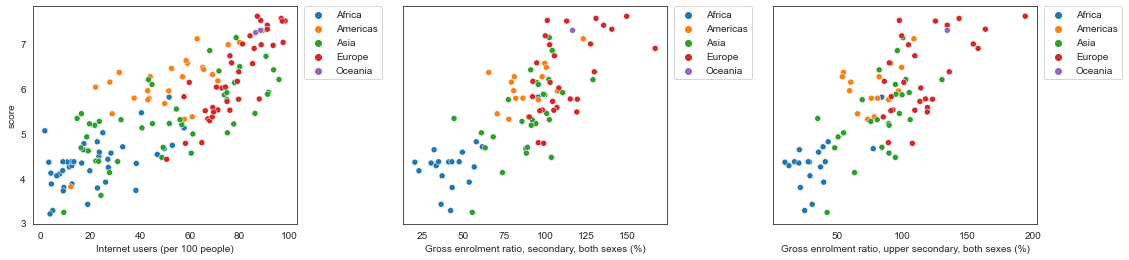

In [170]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True,figsize=(18,4))
plt.subplots_adjust(wspace=0.4)
sns.scatterplot(x = "Internet users (per 100 people)", y="score", data=agg ,hue = "region",ax=ax1)
ax1.legend(bbox_to_anchor=(1.32, 1), loc='upper right', borderaxespad=0)
sns.scatterplot(x = "Gross enrolment ratio, secondary, both sexes (%)", y="score", data=agg ,hue = "region",ax=ax2)
ax2.legend(bbox_to_anchor=(1.32, 1), loc='upper right', borderaxespad=0)
sns.scatterplot(x = "Gross enrolment ratio, upper secondary, both sexes (%)", y="score", data=agg ,hue = "region",ax=ax3)
ax3.legend(bbox_to_anchor=(1.32, 1), loc='upper right', borderaxespad=0)
plt.savefig(OUTPUTDIR + "corr_pos.png", bbox_inches="tight")

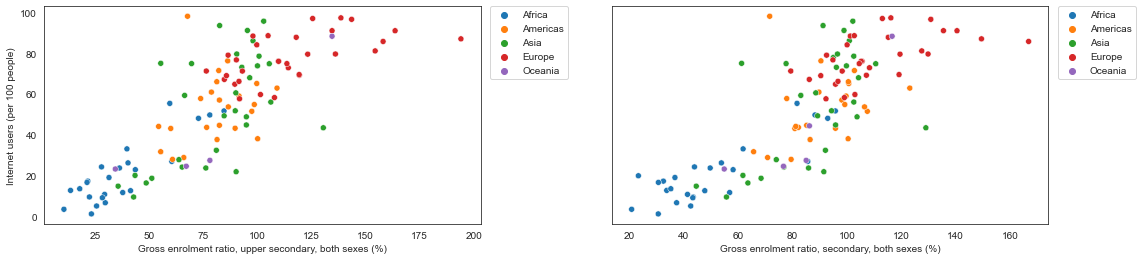

In [178]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(18,4))
plt.subplots_adjust(wspace=0.3)
sns.scatterplot(x = "Gross enrolment ratio, upper secondary, both sexes (%)", y="Internet users (per 100 people)", data=agg ,hue = "region",ax=ax1)
ax1.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
sns.scatterplot(x = "Gross enrolment ratio, secondary, both sexes (%)", y="Internet users (per 100 people)", data=agg ,hue = "region",ax=ax2)
ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
plt.savefig(OUTPUTDIR + "corr_features.png", bbox_inches="tight")